In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_64539_G')

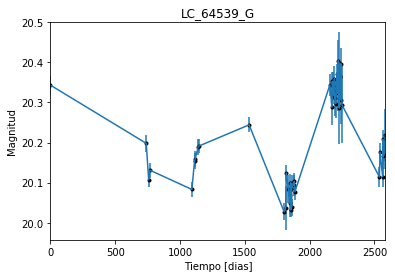

In [2]:
data = np.genfromtxt('LC_64539_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_64539_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

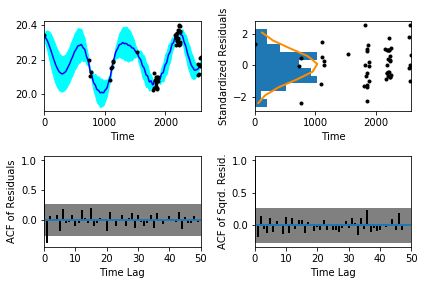

In [5]:
sample.assess_fit()

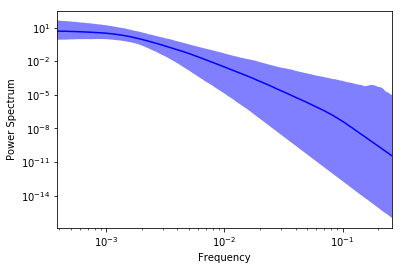

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_64539_G')

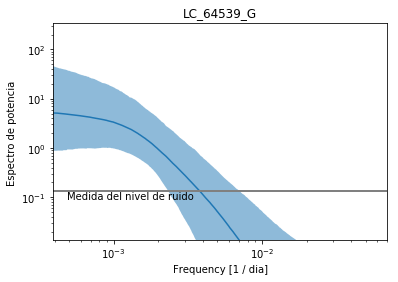

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_64539_G')

Text(0.5,1,'Prediccion , valor esperado LC_64539_G')

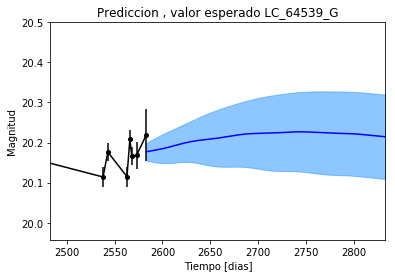

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_64539_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_64539_G')

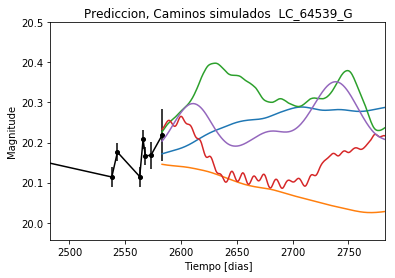

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_64539_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_64539_G')

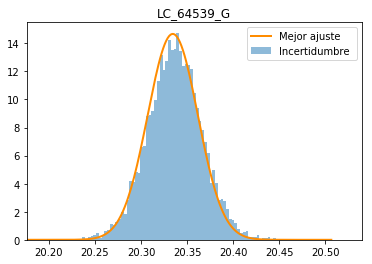

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_64539_G')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_G')

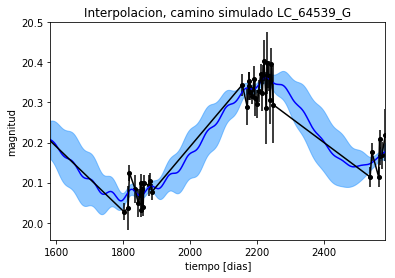

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_G')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_G')

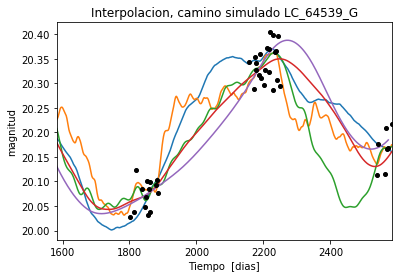

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 591.22693145
Median: 0.00530553910651
Standard deviation: 0.0989576916749
68% credibility interval: [ 0.00074533  0.07556144]
95% credibility interval: [ 0.000426    0.39586109]
99% credibility interval: [  3.92206193e-04   5.08498638e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 901.865805315
Median: 0.00191346391294
Standard deviation: 0.0336789187068
68% credibility interval: [ 0.00060342  0.01462685]
95% credibility interval: [ 0.00041344  0.10287935]
99% credibility interval: [ 0.00039104  0.24773787]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 549.32266322
Median: 0.00866537160594
Standard deviation: 0.112266

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 564.725646716
Median: 104.877431898
Standard deviation: 1.7145552329
68% credibility interval: [ 103.06740178  106.15215876]
95% credibility interval: [ 100.37770647  107.26149491]
99% credibility interval: [  98.50759875  107.70545257]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 794.216353784
Median: 0.279499058634
Standard deviation: 1.07451648973
68% credibility interval: [ 0.03519973  1.77285265]
95% credibility interval: [ 0.01429088  3.62474917]
99% credibility interval: [ 0.0112336   5.03192536]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 689.043733953
Median: 0.13705847798
Standard deviation: 2.29663450301
68% credibility interval: [ 0.00571824  2.200284  ]
95% credibility interval: [  3.45016898e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 720.717233358
Median: 4.79441806165e-21
Standard deviation: 5.57158975162e+12
68% credibility interval: [  4.58236624e-65   4.78124686e-04]
95% credibility interval: [  1.64136664e-98   6.39626317e+06]
99% credibility interval: [  2.12644085e-133   1.21350343e+011]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3751.0432456
Median: 20.2091157912
Standard deviation: 0.0694409194476
68% credibility interval: [ 20.16204093  20.26714001]
95% credibility interval: [ 20.08834248  20.36343228]
99% credibility interval: [ 20.01416486  20.46500777]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 565.01428812
Median: 0.00539636222409
Standard deviation: 0.127362086619
68% credibility interval: [ 0.          0.19715022]
95% credibility interval: [ 0.          0.45593015]
99% credibility interval: [ 0.          0.50839165]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 565.01428812
Median: 0.00539636222409
Standard deviation: 0.127362086619
68% credibility interval: [ 0.          0.19715022]
95% credibility interval: [ 0.          0.45593015]
99% credibility interval: [ 0.          0.50839165]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 660.308582762
Median: 0.0
Standard deviation: 0.000642801812954
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 564.725646716
Median: 104.877431898
Standard deviation: 1.7145552329
68% credibility interval: [ 103.06740178  106.15215876]
95% credibility interval: [ 100.37770647  107.26149491]
99% credibility interval: [  98.50759875  107.70545257]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1173.15660916
Median: 0.0171767450382
Standard deviation: 0.0304151233747
68% credibility interval: [ 0.00966414  0.03517545]
95% credibility interval: [ 0.00598881  0.09581788]
99% credibility interval: [ 0.00482577  0.20393069]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1009.62612146
Median: 1.12032023571
Standard deviation: 0.184913580709
68% credibility interval: [ 0.95228808  1.311885  ]
95% credibility interval: [ 0.81727519  1.55727087]
99% credibility interval: [ 0.73752046  1.70875208]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 921.226235393
Median: 3.39279578294e-05
Standard deviation: 0.0123359108088
68% credibility interval: [  5.64618247e-07   1.09972143e-03]
95% credibility interval: [  1.42213296e-12   1.52549279e-02]
99% credibility interval: [  9.26569528e-16   5.20825957e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 591.22693145
Median: (-0.0333356853607-1.20683326776j)
Standard deviation: 1.01340057851
68% credibility interval: [-0.47476652-0.30343145j -0.00468302-0.00432951j]
95% credibility interval: [-2.48726861+0.j         -0.00267663-0.00583354j]
99% credibility interval: [ -3.19499117e+00+0.j          -2.46430419e-03-0.00851828j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 901.865805315
Median: (-0.0120226483436+0.588797209372j)
Standard deviation: 0.827745474838
68% credibility interval: [-0.09190323+2.38718654j -0.00379137+0.01004665j]
95% credibility interval: [-0.64641001+0.j         -0.00259772+0.00736439j]
99% credibility interval: [-1.55658295+2.56201321j -0.00245700+0.0055454j ]
Posterior summary for parameter a